In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
path = '/Users/josue/phd/'

In [5]:
t = xr.open_dataset(path+'ocean-3d-temp-1-monthly-mean-ym_1988_01.nc')

In [41]:
t.temp.isel({'time':0,'st_ocean':0})

<xarray.DataArray 'temp' (yt_ocean: 2700, xt_ocean: 3600)>
[9720000 values with dtype=float32]
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    st_ocean  float64 0.5413
    time      datetime64[ns] 1988-01-16T12:00:00
Attributes:
    long_name:      Conservative temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_conservative_temperature

In [7]:
3600*2700

9720000

In [8]:
g = xr.open_dataset(path+'ocean_grid_01.nc')

In [9]:
g

<xarray.Dataset>
Dimensions:     (grid_x_C: 3600, grid_x_T: 3600, grid_y_C: 2700, grid_y_T: 2700, zb: 75, zt: 75)
Coordinates:
  * zt          (zt) float32 0.54128075 1.6807346 ... 5511.1772 5709.443
  * zb          (zb) float32 1.0825615 2.2789078 ... 5610.229 5808.6567
Dimensions without coordinates: grid_x_C, grid_x_T, grid_y_C, grid_y_T
Data variables:
    geolon_t    (grid_y_T, grid_x_T) float64 ...
    geolon_c    (grid_y_C, grid_x_C) float64 ...
    geolat_t    (grid_y_T, grid_x_T) float64 ...
    geolat_c    (grid_y_C, grid_x_C) float64 ...
    depth_t     (grid_y_T, grid_x_T) float64 ...
    num_levels  (grid_y_T, grid_x_T) float64 ...
Attributes:
    history:  Fri Mar 20 16:34:09 2020: ncrename -v x_T,geolon_t -v x_C,geolo...
    NCO:      netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, C...

In [21]:
import intergrid.intergrid as intergrid

In [60]:
griddata = t.temp.isel({'time':0,'st_ocean':0})

In [53]:
x=np.arange(-279.9,79.95,0.1)
y=np.arange(-90,90,0.1)

In [56]:
%%time
interp_data = griddata.interp({'yt_ocean':y,'xt_ocean':x})

CPU times: user 4.86 s, sys: 227 ms, total: 5.09 s
Wall time: 1.83 s


CPU times: user 486 ms, sys: 53.6 ms, total: 539 ms
Wall time: 540 ms


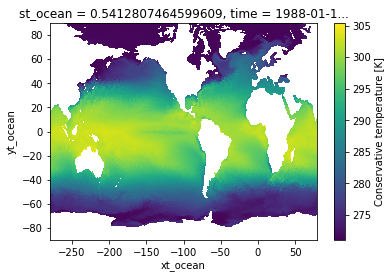

In [59]:
%%time
interp_data.plot()

In [9]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', 
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

In [10]:
import cmocean as cm
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

CPU times: user 1min 21s, sys: 1.03 s, total: 1min 22s
Wall time: 1min 21s


Text(0, 0.5, 'SST (°C)')

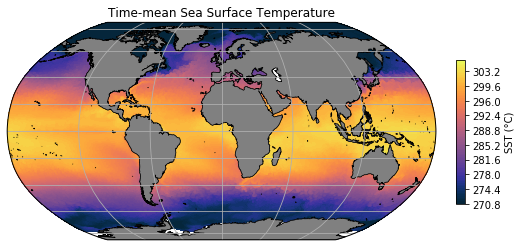

In [11]:
%%time

geolon_t = g.geolon_t
geolat_t = g.geolat_t

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
p1 = ax.contourf(geolon_t, geolat_t, t.temp.isel({'st_ocean':0,'time':0}), 100, transform=ccrs.PlateCarree(),
                 cmap=cm.cm.thermal)
plt.title('Time-mean Sea Surface Temperature')

ax_cb = plt.axes([0.92,0.25,0.015,0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('SST (°C)')

CPU times: user 16.7 s, sys: 604 ms, total: 17.3 s
Wall time: 16.1 s


(-17005833.33052523, 17005833.33052523, -8625155.12857459, 8624477.195475694)

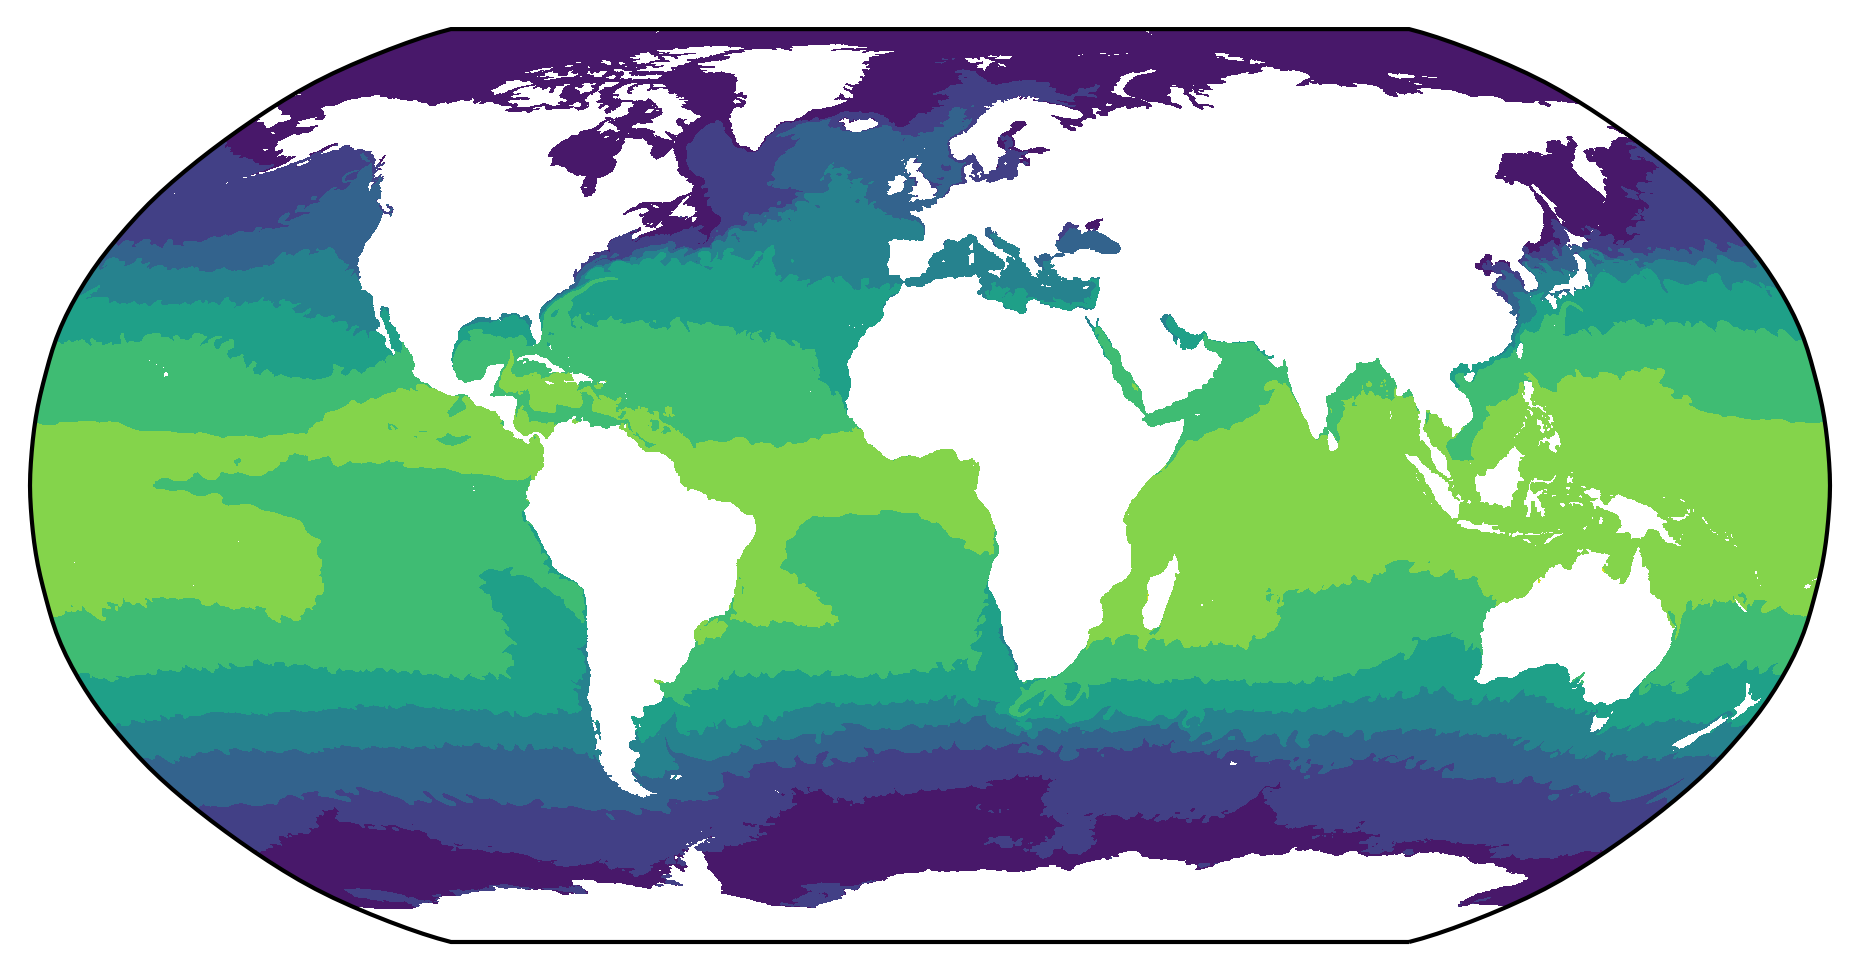

In [12]:
%%time
fig = plt.figure(dpi=300)
ax = fig.add_axes((0,0,1,1),projection=ccrs.Robinson(central_longitude=0))

image = ax.contourf(g.geolon_t,g.geolat_t,t.temp.isel({'st_ocean':0,'time':0}),transform=ccrs.PlateCarree())
fig.patch.set_visible(False)
plt.axis('off')

CPU times: user 4.27 s, sys: 451 ms, total: 4.72 s
Wall time: 4.1 s


(-179.99991694753547,
 179.99991694753547,
 -81.10863167835483,
 89.97616087629147)

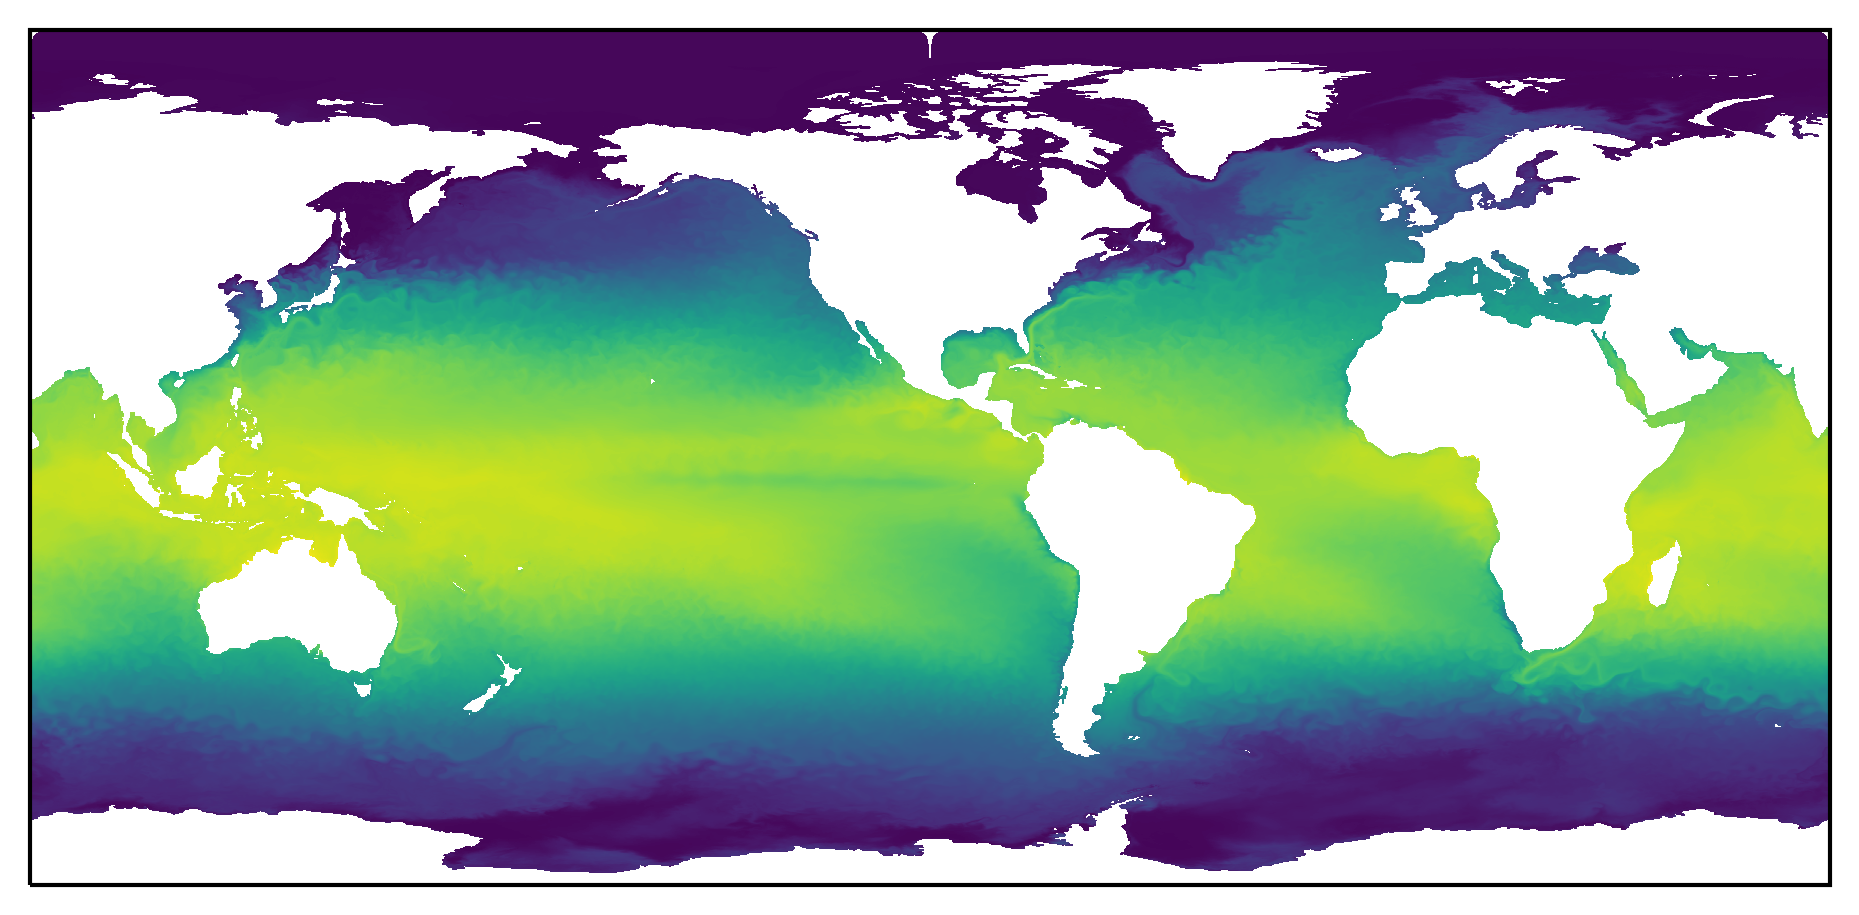

In [13]:
%%time
fig = plt.figure(dpi=300)
ax = fig.add_axes((0,0,1,1),projection=ccrs.PlateCarree(central_longitude=-100))

image = ax.pcolormesh(g.geolon_t,g.geolat_t,t.temp.isel({'st_ocean':0,'time':0}),transform=ccrs.PlateCarree())
fig.patch.set_visible(False)
plt.axis('off')

CPU times: user 2.42 s, sys: 300 ms, total: 2.72 s
Wall time: 2.83 s


(-279.99991694753544, 79.99991694753547, -81.10863167835483, 89.97616087629147)

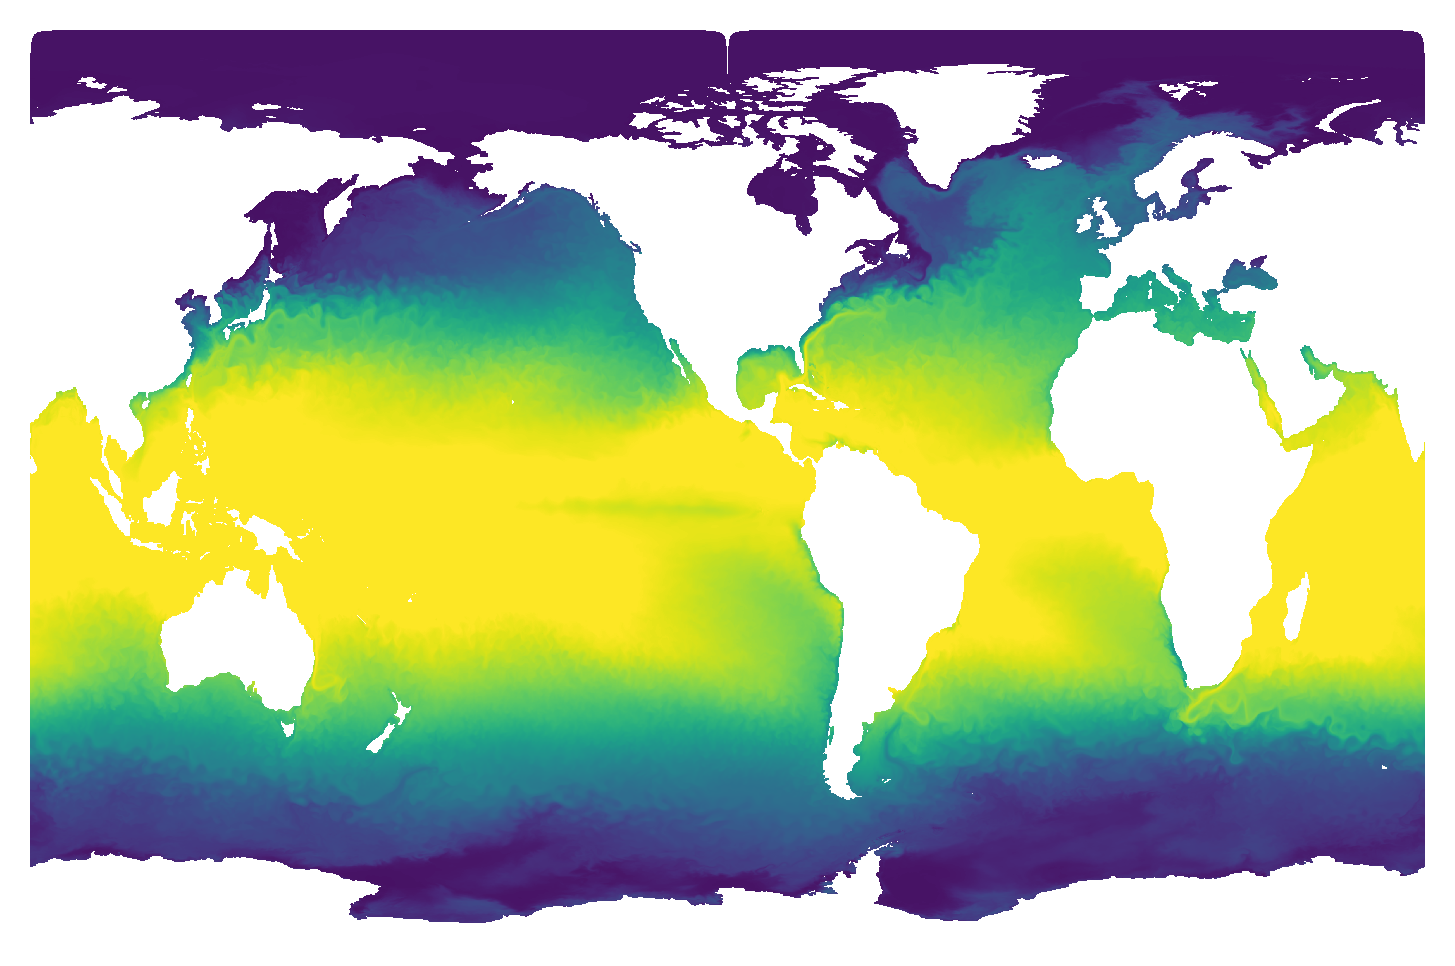

In [58]:
%%time
import matplotlib
matplotlib.use('agg')

fig = plt.figure(dpi=300)
image = plt.pcolormesh(g.geolon_t,g.geolat_t,t.temp.isel({'st_ocean':0,'time':0}),vmin=270,vmax=300)
fig.patch.set_visible(False)
plt.axis('off')

In [16]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [17]:
import numpy as np

In [18]:
%%time
#dir(fig)
canvas = FigureCanvas(fig)

CPU times: user 43 µs, sys: 1 µs, total: 44 µs
Wall time: 47 µs


In [19]:
canvas.draw()

In [20]:
dir(canvas)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_button',
 '_fix_ipython_backend2gui',
 '_get_output_canvas',
 '_idle_draw_cntx',
 '_is_idle_drawing',
 '_is_saving',
 '_key',
 '_lastKey',
 '_lastx',
 '_lasty',
 'blit',
 'buffer_rgba',
 'button_pick_id',
 'button_press_event',
 'button_release_event',
 'callbacks',
 'close_event',
 'copy_from_bbox',
 'draw',
 'draw_cursor',
 'draw_event',
 'draw_idle',
 'enter_notify_event',
 'events',
 'figure',
 'filetypes',
 'fixed_dpi',
 'flush_events',
 'get_default_filename',
 'get_default_filetype',
 'get_renderer',
 'get_supported_filetypes',
 'get_supported_filetypes_grouped',
 'get_width_height',
 'get_window_title',
 'grab_m

In [ ]:
image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')

In [ ]:
29160000/3600/2700 

In [ ]:
new_image = image.reshape((2700,3600,3))/255 - 1

In [ ]:
my_dpi = 300
fig = plt.figure(figsize=(3600/my_dpi, 2700/my_dpi), dpi=my_dpi)
plt.imshow(np.array(abs((new_image+1)*255),dtype=int))
fig.patch.set_visible(False)
plt.axis('off')

In [24]:
def distance_matrix(x0, y0, x1, y1):
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    # Make a distance matrix between pairwise observations
    # Note: from <http://stackoverflow.com/questions/1871536>
    # (Yay for ufuncs!)
    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])

    return np.hypot(d0, d1)

def linear_rbf(x, y, z, xi, yi):
    dist = distance_matrix(x,y, xi,yi)

    # Mutual pariwise distances between observations
    internal_dist = distance_matrix(x,y, x,y)

    # Now solve for the weights such that mistfit at the observations is minimized
    weights = np.linalg.solve(internal_dist, z)

    # Multiply the weights for each interpolated point by the distances
    zi =  np.dot(dist.T, weights)
    return zi

In [28]:
x = g.geolon_t.values.ravel()
y = g.geolon_t.values.ravel()
z = t.temp.isel({'st_ocean':0,'time':0}).values.ravel()

In [ ]:
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
xi, yi = xi.flatten(), yi.flatten()

grid3 = linear_rbf(x,y,z,xi,yi)

grid3 = grid3.reshape((2700, 3600))

In [71]:
import time
import scipy

In [78]:
y_array = np.random.random(900000).reshape(1000,900)
x_array = np.random.random(900000).reshape(1000,900)

points = np.random.random(900000).reshape(2,450000)

In [79]:
# Shoe-horn existing data for entry into KDTree routines
combined_x_y_arrays = np.dstack([y_array.ravel(),x_array.ravel()])[0]
points_list = list(points.transpose())


def do_kdtree(combined_x_y_arrays,points):
    mytree = scipy.spatial.cKDTree(combined_x_y_arrays)
    dist, indexes = mytree.query(points)
    return indexes

start = time.time()
results2 = do_kdtree(combined_x_y_arrays,points_list)
end = time.time()
print('Completed in: ',end-start)

Completed in:  2.8221819400787354


In [75]:
900000/2

450000.0